# Import necessary libraries

#### These libraries are used for data handling and also data visiualization

In [1]:
import pandas as pd # Data manipulation 

In [2]:
from sklearn.model_selection import train_test_split # sklearn for machine learning 

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [6]:
import matplotlib.pyplot as plt # Visualization 

#### Get the required dataset, load it into pandas dataframe "df" 

In [7]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

#### Drop (remove) rows where the "bmi" has missing values 

In [8]:
df.dropna(subset=['bmi'], inplace=True)

#### Check for missing values, will return the number of missing values

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### X will contain all columns except "stroke", while Y contains the target variable "stroke" 

In [10]:
X = df.drop('stroke', axis=1)
y = df['stroke']

#### Split the data into training and testing sets. tests will be 30% while training will be the rest (70%)

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3436, 11)
Shape of X_test: (1473, 11)
Shape of y_train: (3436,)
Shape of y_test: (1473,)


#### Convert into numerical form

In [13]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [14]:
df = pd.get_dummies(df, columns=['gender', 'work_type', 'Residence_type', 'smoking_status'])

#### Drop any remaining rows with missing values

In [15]:
df = df.dropna() 

In [16]:
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
df.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
ever_married         0
avg_glucose_level    0
bmi                  0
stroke               0
gender_0             0
gender_1             0
gender_2             0
work_type_0          0
work_type_1          0
work_type_2          0
work_type_3          0
work_type_4          0
Residence_type_0     0
Residence_type_1     0
smoking_status_0     0
smoking_status_1     0
smoking_status_2     0
smoking_status_3     0
dtype: int64

#### Display data types (all should be in numerical format)

In [18]:
print(X_train.dtypes)
print(X_test.dtypes)

id                     int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
avg_glucose_level    float64
bmi                  float64
gender_0                bool
gender_1                bool
gender_2                bool
work_type_0             bool
work_type_1             bool
work_type_2             bool
work_type_3             bool
work_type_4             bool
Residence_type_0        bool
Residence_type_1        bool
smoking_status_0        bool
smoking_status_1        bool
smoking_status_2        bool
smoking_status_3        bool
dtype: object
id                     int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
avg_glucose_level    float64
bmi                  float64
gender_0                bool
gender_1                bool
gender_2                bool
work_type_0             bool
work_type_1             bool
work_type_2             bool


#### Apply one hot enoding to training and testing sets

In [19]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

#### Align to ensure that both training and testing have the same columns

In [20]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [21]:
print(X_train.columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_0', 'gender_1', 'gender_2', 'work_type_0', 'work_type_1',
       'work_type_2', 'work_type_3', 'work_type_4', 'Residence_type_0',
       'Residence_type_1', 'smoking_status_0', 'smoking_status_1',
       'smoking_status_2', 'smoking_status_3', 'ever_married_No',
       'ever_married_Yes'],
      dtype='object')


In [22]:
columns_to_check = ['gender', 'work_type', 'Residence_type', 'smoking_status']

In [23]:
for column in columns_to_check:
    if column not in X_train.columns:
        print(f"Column {column} is missing in X_train")

Column gender is missing in X_train
Column work_type is missing in X_train
Column Residence_type is missing in X_train
Column smoking_status is missing in X_train


In [24]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [25]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [26]:
columns_to_check = ['gender', 'work_type', 'Residence_type', 'smoking_status']

In [27]:
for column in columns_to_check:
    if column not in X_train.columns:
        print(f"Column {column} is missing in X_train")

Column gender is missing in X_train
Column work_type is missing in X_train
Column Residence_type is missing in X_train
Column smoking_status is missing in X_train


In [28]:
label_encoders = {}
columns_to_encode = ['gender', 'work_type', 'Residence_type', 'smoking_status']

for column in columns_to_encode:
    if column in X_train.columns:
        le = LabelEncoder()
        X_train[column] = le.fit_transform(X_train[column])
        X_test[column] = le.transform(X_test[column])
        label_encoders[column] = le
    else:
        print(f"Column {column} not found in X_train or X_test")

Column gender not found in X_train or X_test
Column work_type not found in X_train or X_test
Column Residence_type not found in X_train or X_test
Column smoking_status not found in X_train or X_test


In [29]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train columns: Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_0', 'gender_1', 'gender_2', 'work_type_0', 'work_type_1',
       'work_type_2', 'work_type_3', 'work_type_4', 'Residence_type_0',
       'Residence_type_1', 'smoking_status_0', 'smoking_status_1',
       'smoking_status_2', 'smoking_status_3', 'ever_married_No',
       'ever_married_Yes'],
      dtype='object')
X_test columns: Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_0', 'gender_1', 'gender_2', 'work_type_0', 'work_type_1',
       'work_type_2', 'work_type_3', 'work_type_4', 'Residence_type_0',
       'Residence_type_1', 'smoking_status_0', 'smoking_status_1',
       'smoking_status_2', 'smoking_status_3', 'ever_married_No',
       'ever_married_Yes'],
      dtype='object')


In [30]:
columns_to_encode = {
    'gender': ['gender_0', 'gender_1', 'gender_2'],
    'work_type': ['work_type_0', 'work_type_1', 'work_type_2', 'work_type_3', 'work_type_4'],
    'Residence_type': ['Residence_type_0', 'Residence_type_1'],
    'smoking_status': ['smoking_status_0', 'smoking_status_1', 'smoking_status_2', 'smoking_status_3']
}

In [31]:
for original_column, encoded_columns in columns_to_encode.items():
    for column in encoded_columns:
        if column in X_train.columns:
            le = LabelEncoder()
            X_train[column] = le.fit_transform(X_train[column])
            X_test[column] = le.transform(X_test[column])
            label_encoders[column] = le
        else:
            print(f"Column {column} not found in X_train or X_test")

In [32]:
encoded_columns = {
    'gender': ['gender_0', 'gender_1', 'gender_2'],
    'work_type': ['work_type_0', 'work_type_1', 'work_type_2', 'work_type_3', 'work_type_4'],
    'Residence_type': ['Residence_type_0', 'Residence_type_1'],
    'smoking_status': ['smoking_status_0', 'smoking_status_1', 'smoking_status_2', 'smoking_status_3']
}

In [33]:
feature_columns = (encoded_columns['gender'] +
                   encoded_columns['work_type'] +
                   encoded_columns['Residence_type'] +
                   encoded_columns['smoking_status'])

X_train_ready = X_train[feature_columns]
X_test_ready = X_test[feature_columns]

### Initialize and train the decision tree classifier on the training data

In [34]:
clf = DecisionTreeClassifier()
clf.fit(X_train_ready, y_train)

DecisionTreeClassifier()

### Predict the labels for test set

In [35]:
y_pred = clf.predict(X_test_ready)

#### max depth of 5 to prevent overfitting

In [36]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
clf = DecisionTreeClassifier(
    min_samples_split=10,  
    min_samples_leaf=5,   
    random_state=42
)

In [39]:
le = LabelEncoder()

In [40]:
X_train['gender_0'] = le.fit_transform(X_train['gender_0'])
X_test['gender_0'] = le.transform(X_test['gender_0'])

In [41]:
X_train['gender_1'] = le.fit_transform(X_train['gender_1'])
X_test['gender_1'] = le.transform(X_test['gender_1'])

In [42]:
X_train['gender_2'] = le.fit_transform(X_train['gender_2'])
X_test['gender_2'] = le.transform(X_test['gender_2'])

In [43]:
X_train['work_type_0'] = le.fit_transform(X_train['work_type_0'])
X_test['work_type_0'] = le.transform(X_test['work_type_0'])

In [44]:
X_train.columns = X_train.columns.str.strip()
X_test.columns = X_test.columns.str.strip()

In [45]:
X_train['work_type_1'] = le.fit_transform(X_train['work_type_1'])
X_test['work_type_1'] = le.transform(X_test['work_type_1'])

In [46]:
X_train['work_type_2'] = le.fit_transform(X_train['work_type_2'])
X_test['work_type_2'] = le.transform(X_test['work_type_2'])

In [47]:
X_train['work_type_3'] = le.fit_transform(X_train['work_type_3'])
X_test['work_type_3'] = le.transform(X_test['work_type_3'])

In [48]:
X_train['work_type_4'] = le.fit_transform(X_train['work_type_4'])
X_test['work_type_4'] = le.transform(X_test['work_type_4'])

In [49]:
X_train['Residence_type_0'] = le.fit_transform(X_train['Residence_type_0'])
X_test['Residence_type_0'] = le.transform(X_test['Residence_type_0'])

In [50]:
X_train['Residence_type_1'] = le.fit_transform(X_train['Residence_type_1'])
X_test['Residence_type_1'] = le.transform(X_test['Residence_type_1'])

In [51]:
X_train['smoking_status_0'] = le.fit_transform(X_train['smoking_status_0'])
X_test['smoking_status_0'] = le.transform(X_test['smoking_status_0'])

In [52]:
X_train['smoking_status_1'] = le.fit_transform(X_train['smoking_status_1'])
X_test['smoking_status_1'] = le.transform(X_test['smoking_status_1'])

In [53]:
X_train['smoking_status_2'] = le.fit_transform(X_train['smoking_status_2'])
X_test['smoking_status_2'] = le.transform(X_test['smoking_status_2'])

In [54]:
X_train['smoking_status_3'] = le.fit_transform(X_train['smoking_status_3'])
X_test['smoking_status_3'] = le.transform(X_test['smoking_status_3'])

In [55]:
X_train['ever_married'] = le.fit_transform(X_train['ever_married'])
X_test['ever_married'] = le.transform(X_test['ever_married'])

In [56]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [58]:
clf = DecisionTreeClassifier(
    min_samples_split=10,  
    min_samples_leaf=5,    
    random_state=42
)

#### Training the final classifier and making final predictions

In [59]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [60]:
y_pred = clf.predict(X_test)

#### Evaluate performance using confusion matrix, accuracy, precision, recall, and F1 score. Confusion matrix will show the counts of true positives, true negatives, false positives, and false negatives.

In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1376   25]
 [  66    6]]


#### Calculate accuracy

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9382213170400543


In [63]:
cm = confusion_matrix(y_test, y_pred)

In [64]:
precision = precision_score(y_test, y_pred)

In [65]:
recall = recall_score(y_test, y_pred)

In [66]:
f1 = f1_score(y_test, y_pred)

In [67]:
print(f"Confusion Matrix:\n{cm}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Confusion Matrix:
[[1376   25]
 [  66    6]]
Precision: 0.1935483870967742
Recall: 0.08333333333333333
F1 Score: 0.11650485436893204


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1401
           1       0.19      0.08      0.12        72

    accuracy                           0.94      1473
   macro avg       0.57      0.53      0.54      1473
weighted avg       0.92      0.94      0.93      1473



## Visualization 

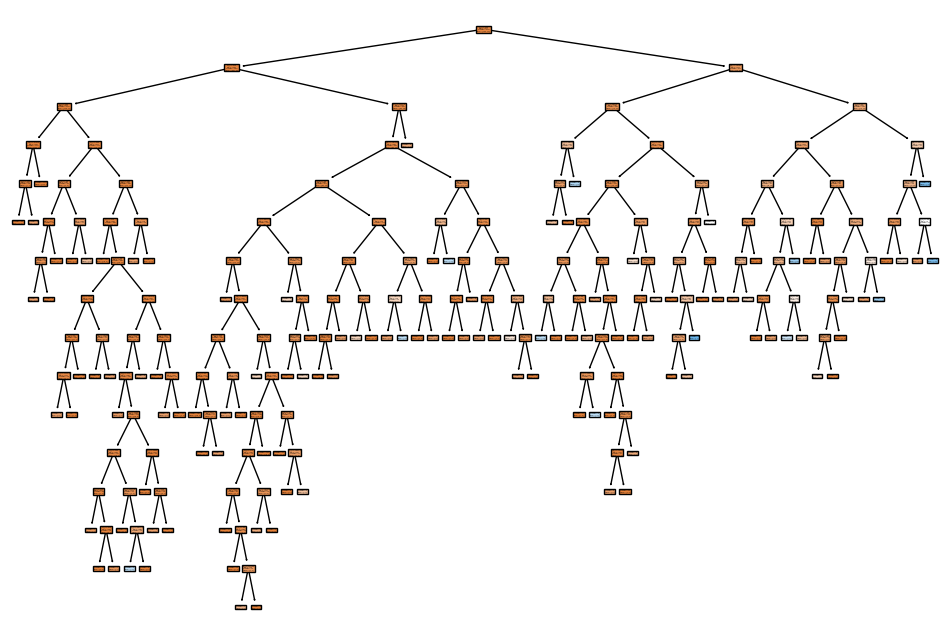

In [69]:
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True)
plt.show()